# Central limit theorem

In [8]:
import numpy as np
import scipy
from scipy.stats import poisson
from scipy.stats import cauchy

import matplotlib.pyplot as plt

import seaborn as sns

plt.rcParams['figure.dpi'] = 200

The *central limit theorem* states, that the sum of $n \rightarrow \infty$ independent, identically distributed (IID) random variables (RVs) tends to a Gaussian distribution, given **finite** variance of the random variables. We therefore sample 100 Poisson and Cauchy distributed RVs, iterate this process for many times, and see if we can approximate the samples with a Gaussian. 

In [9]:
n = 100 #take the mean of 100 values

#Sample Poisson RVs between 1 and 3
pmin = 1
pmax = 3
pstep = 0.01
pbins = np.arange(pmin,pmax,pstep)

In [10]:
#Sample Cauchy RVs between -7 and 7
cmin = -7
cmax = 7
cstep = 0.1
cbins = np.arange(cmin,cmax,cstep)

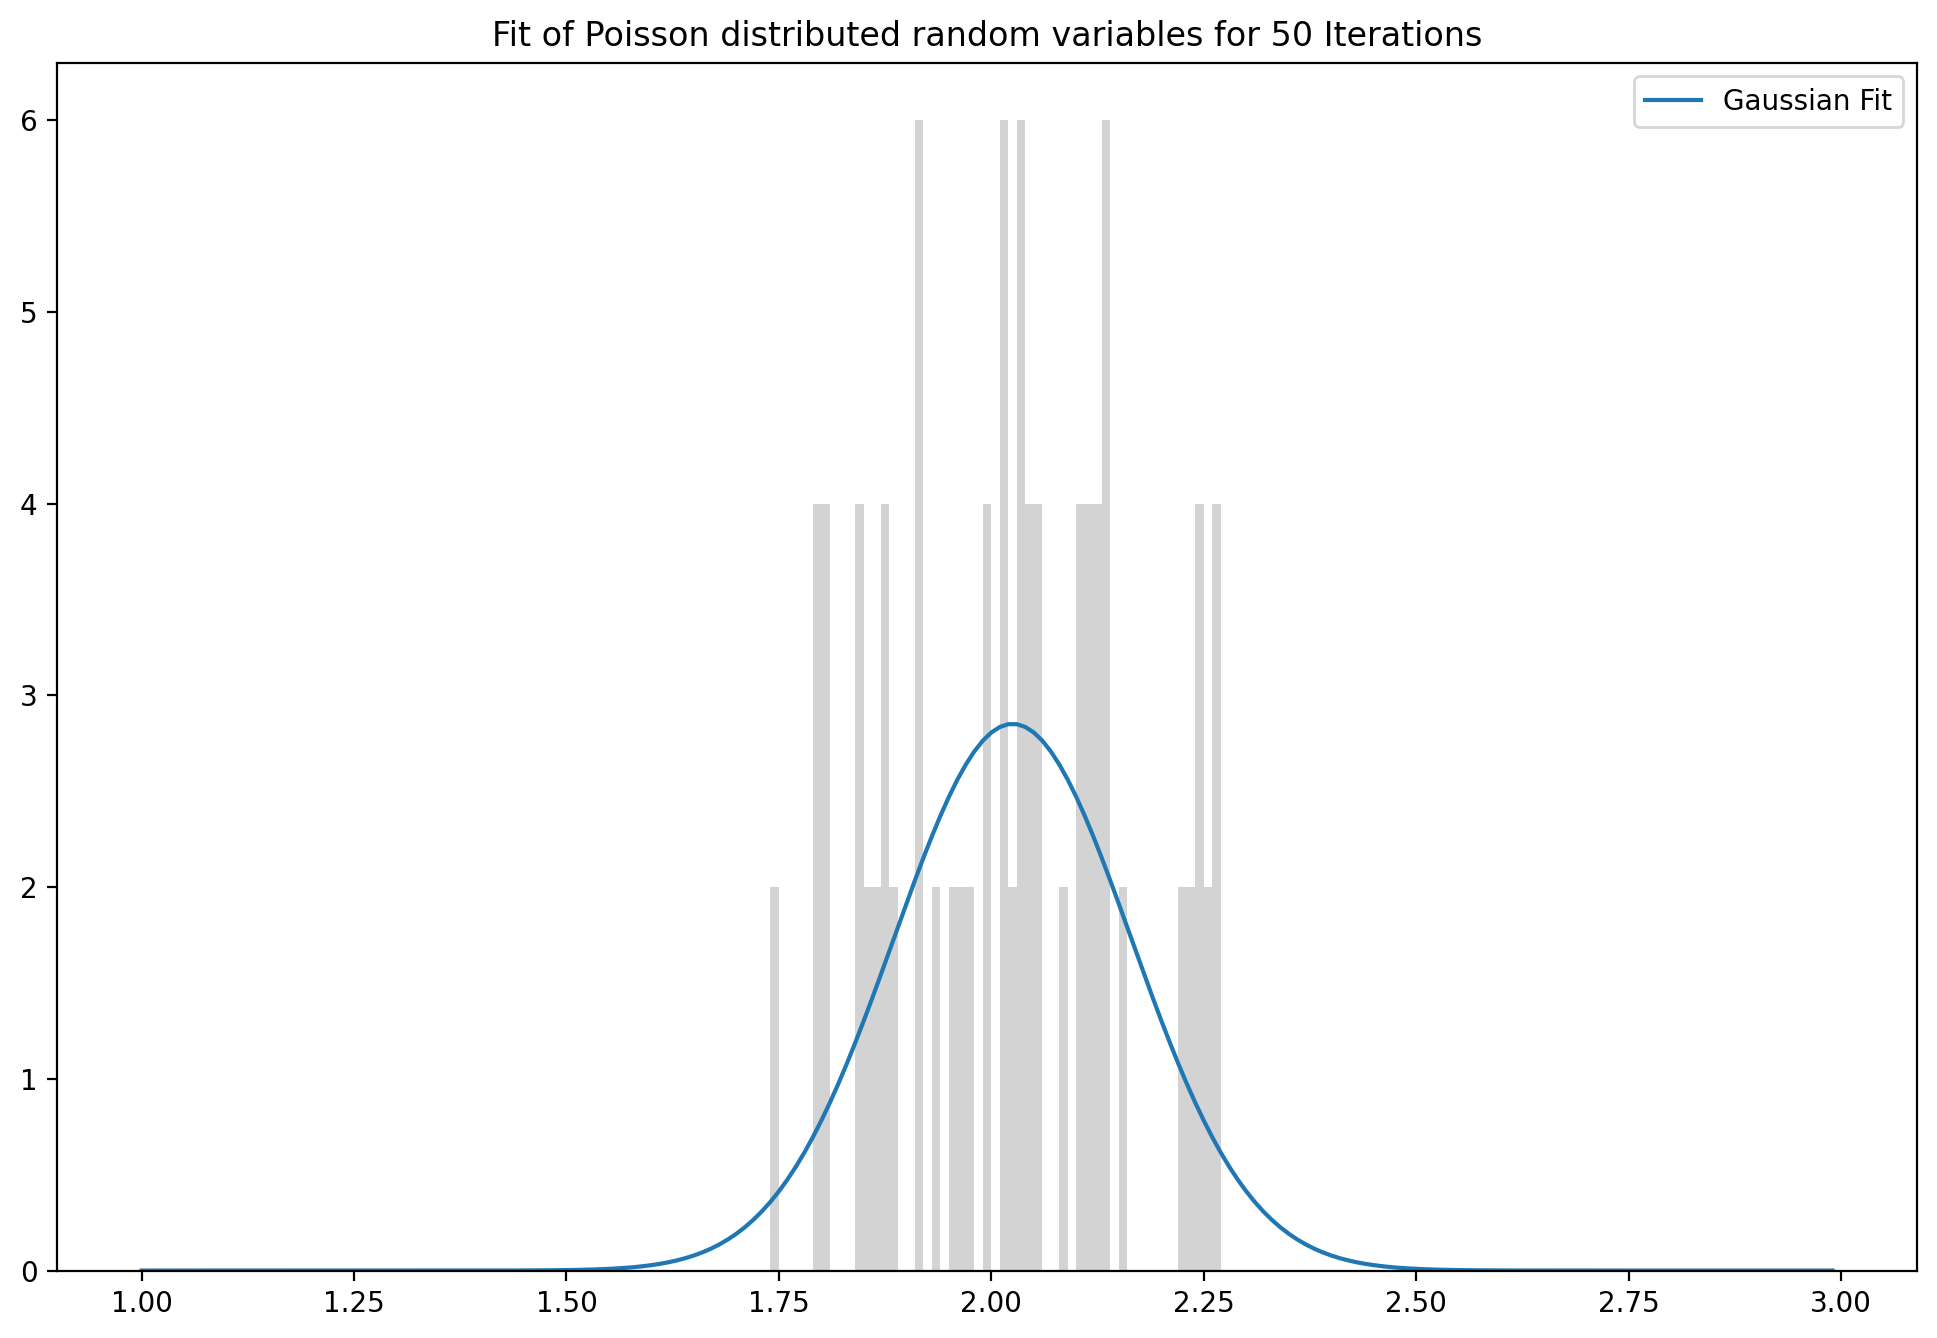

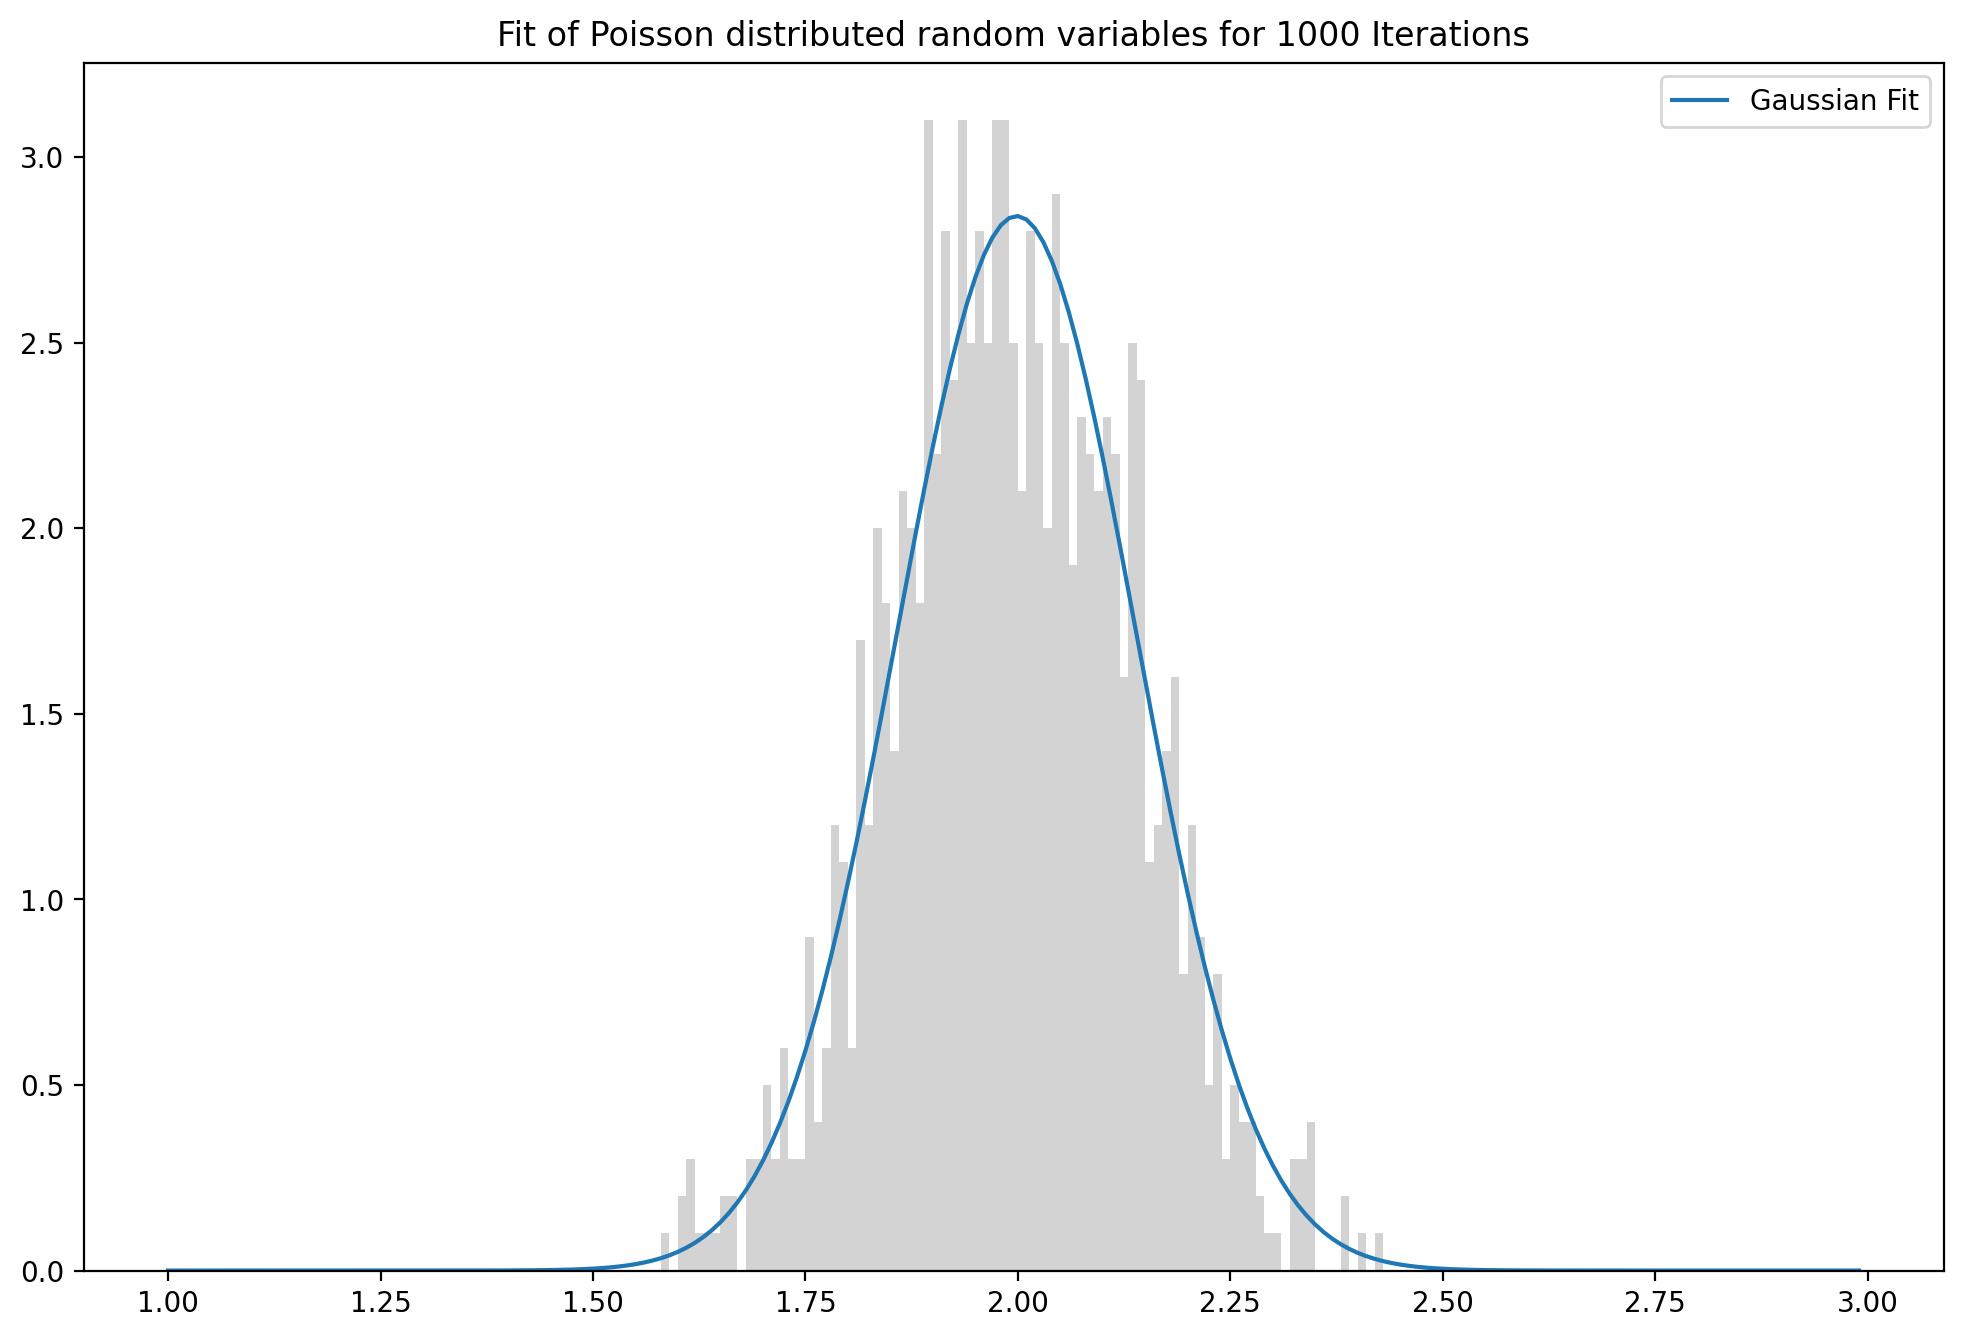

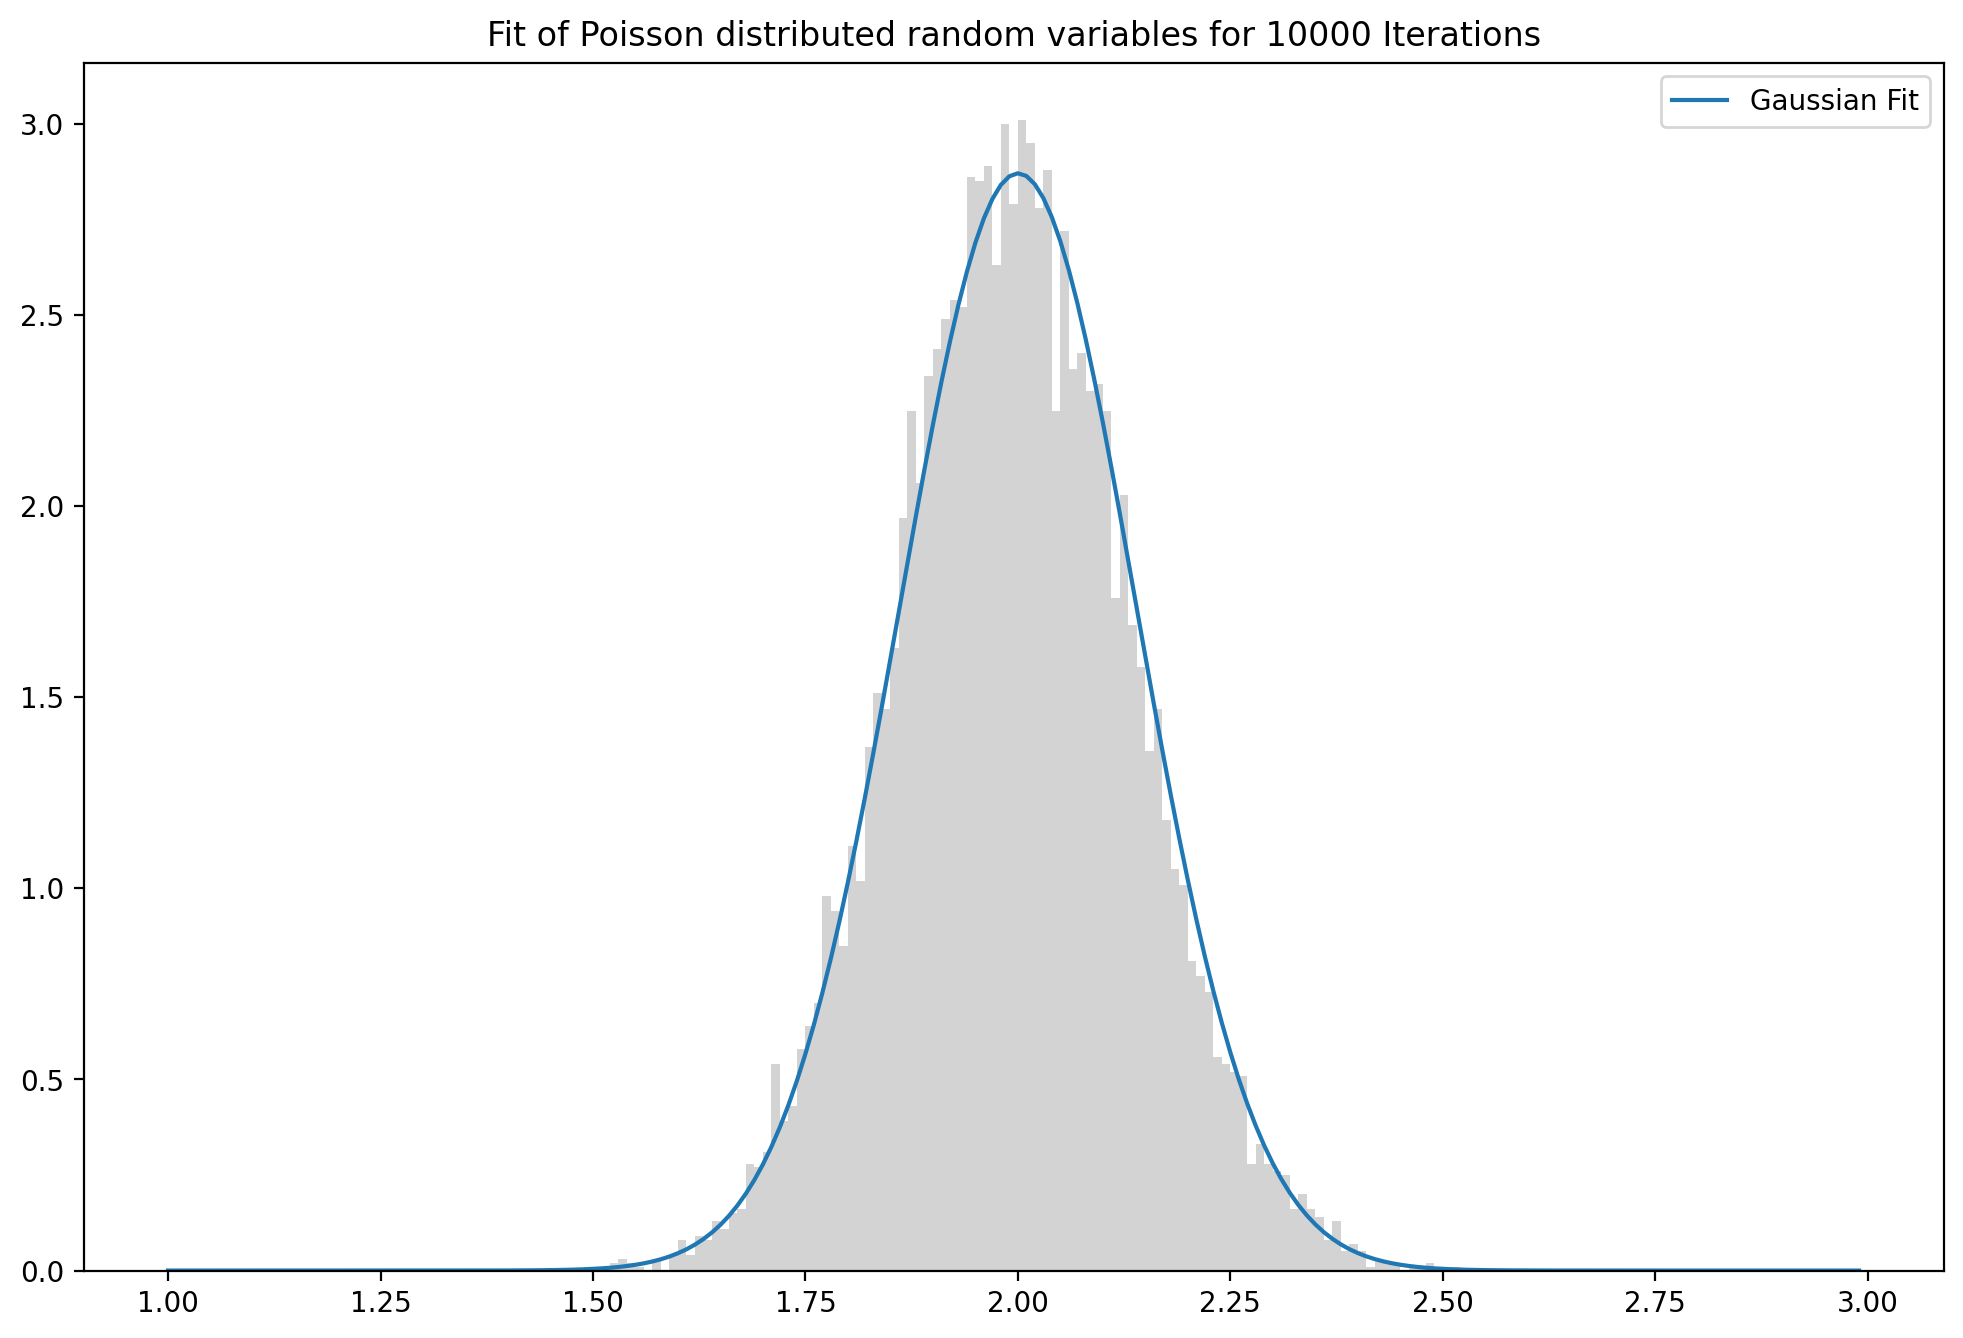

In [11]:
for i,m in enumerate([50, 1000, 10000]):
    pois = [np.mean(poisson.rvs(mu=2,size=n)) for i in range(0,m)]
    mean_p, sigma_p = scipy.stats.norm.fit(pois)
    
    plt.plot(pbins, scipy.stats.norm.pdf(pbins,loc=mean_p,scale=sigma_p), label='Gaussian Fit')
    
    plt.hist(x=pois,bins=pbins, density=True,color='lightgray' );

    plt.title('Fit of Poisson distributed random variables for {} Iterations'.format(m))
    plt.legend(loc='best')
    plt.show();

Indeed, as the number of iterations increases the Gaussian approximates the sum of Poisson RVs better and better.

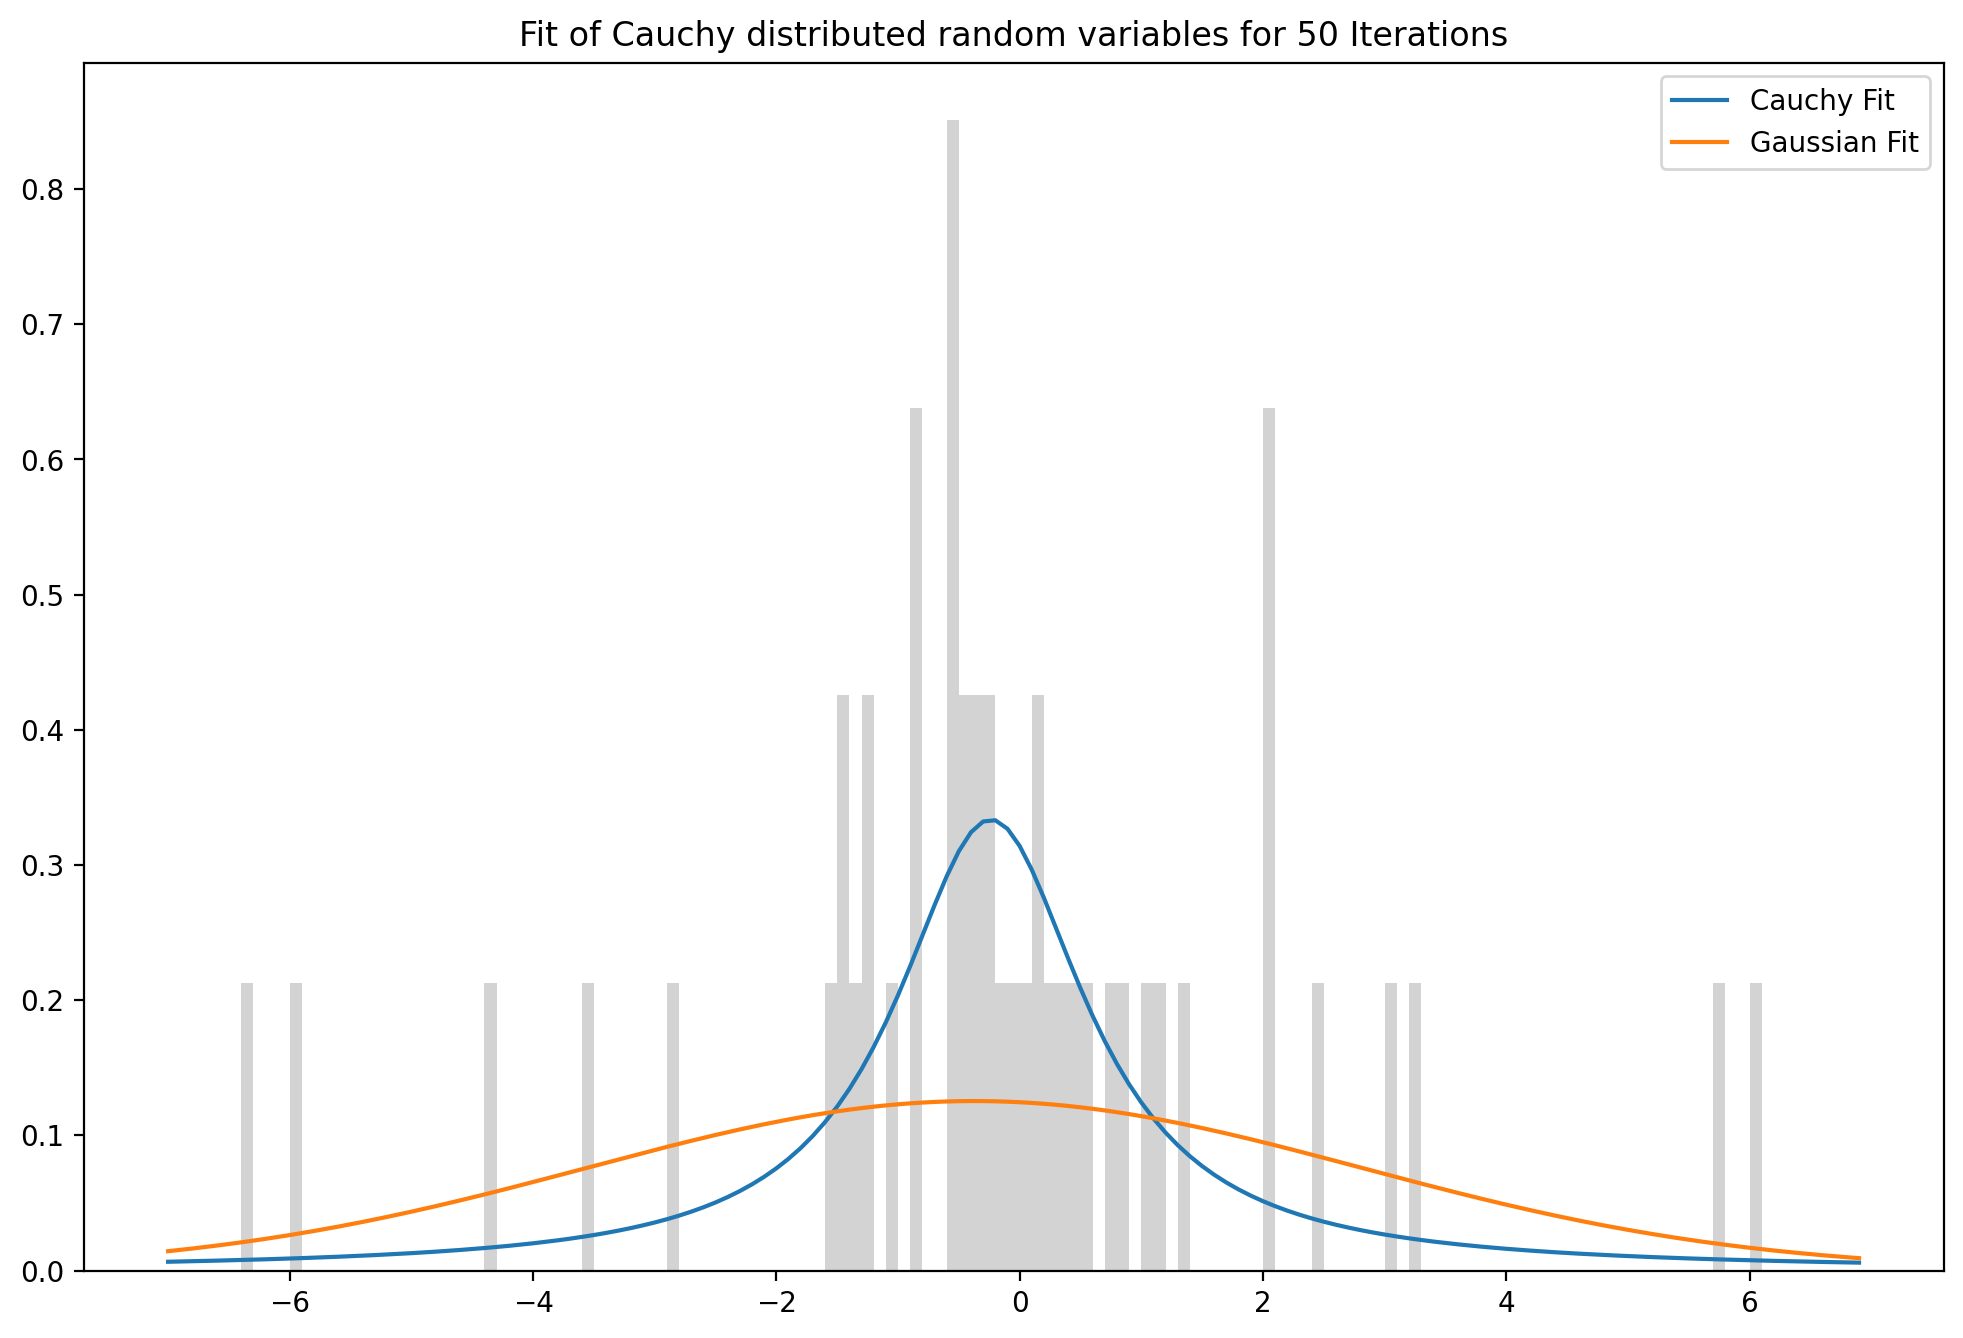

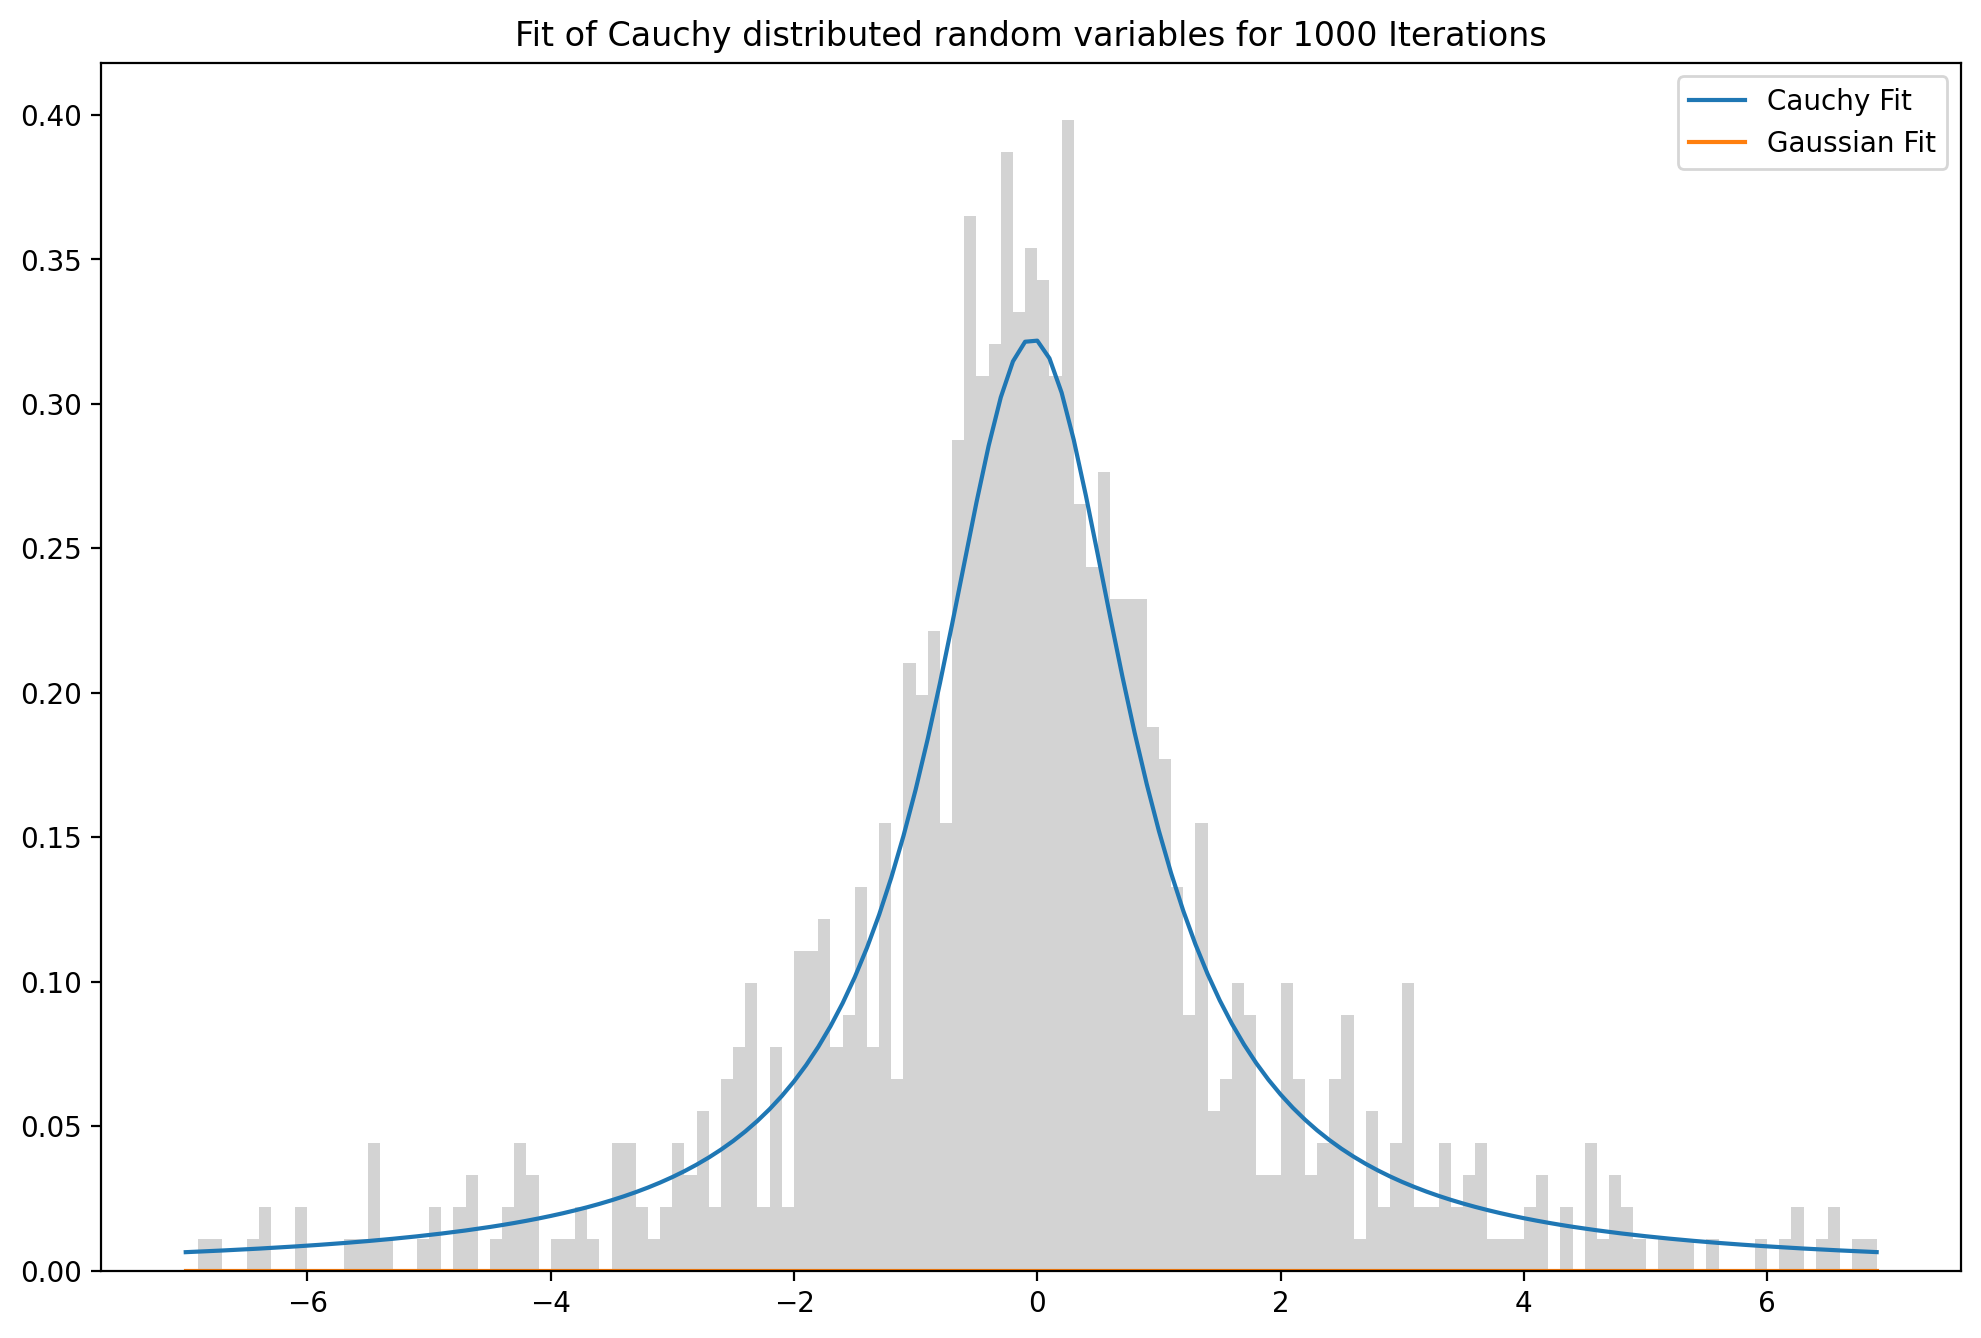

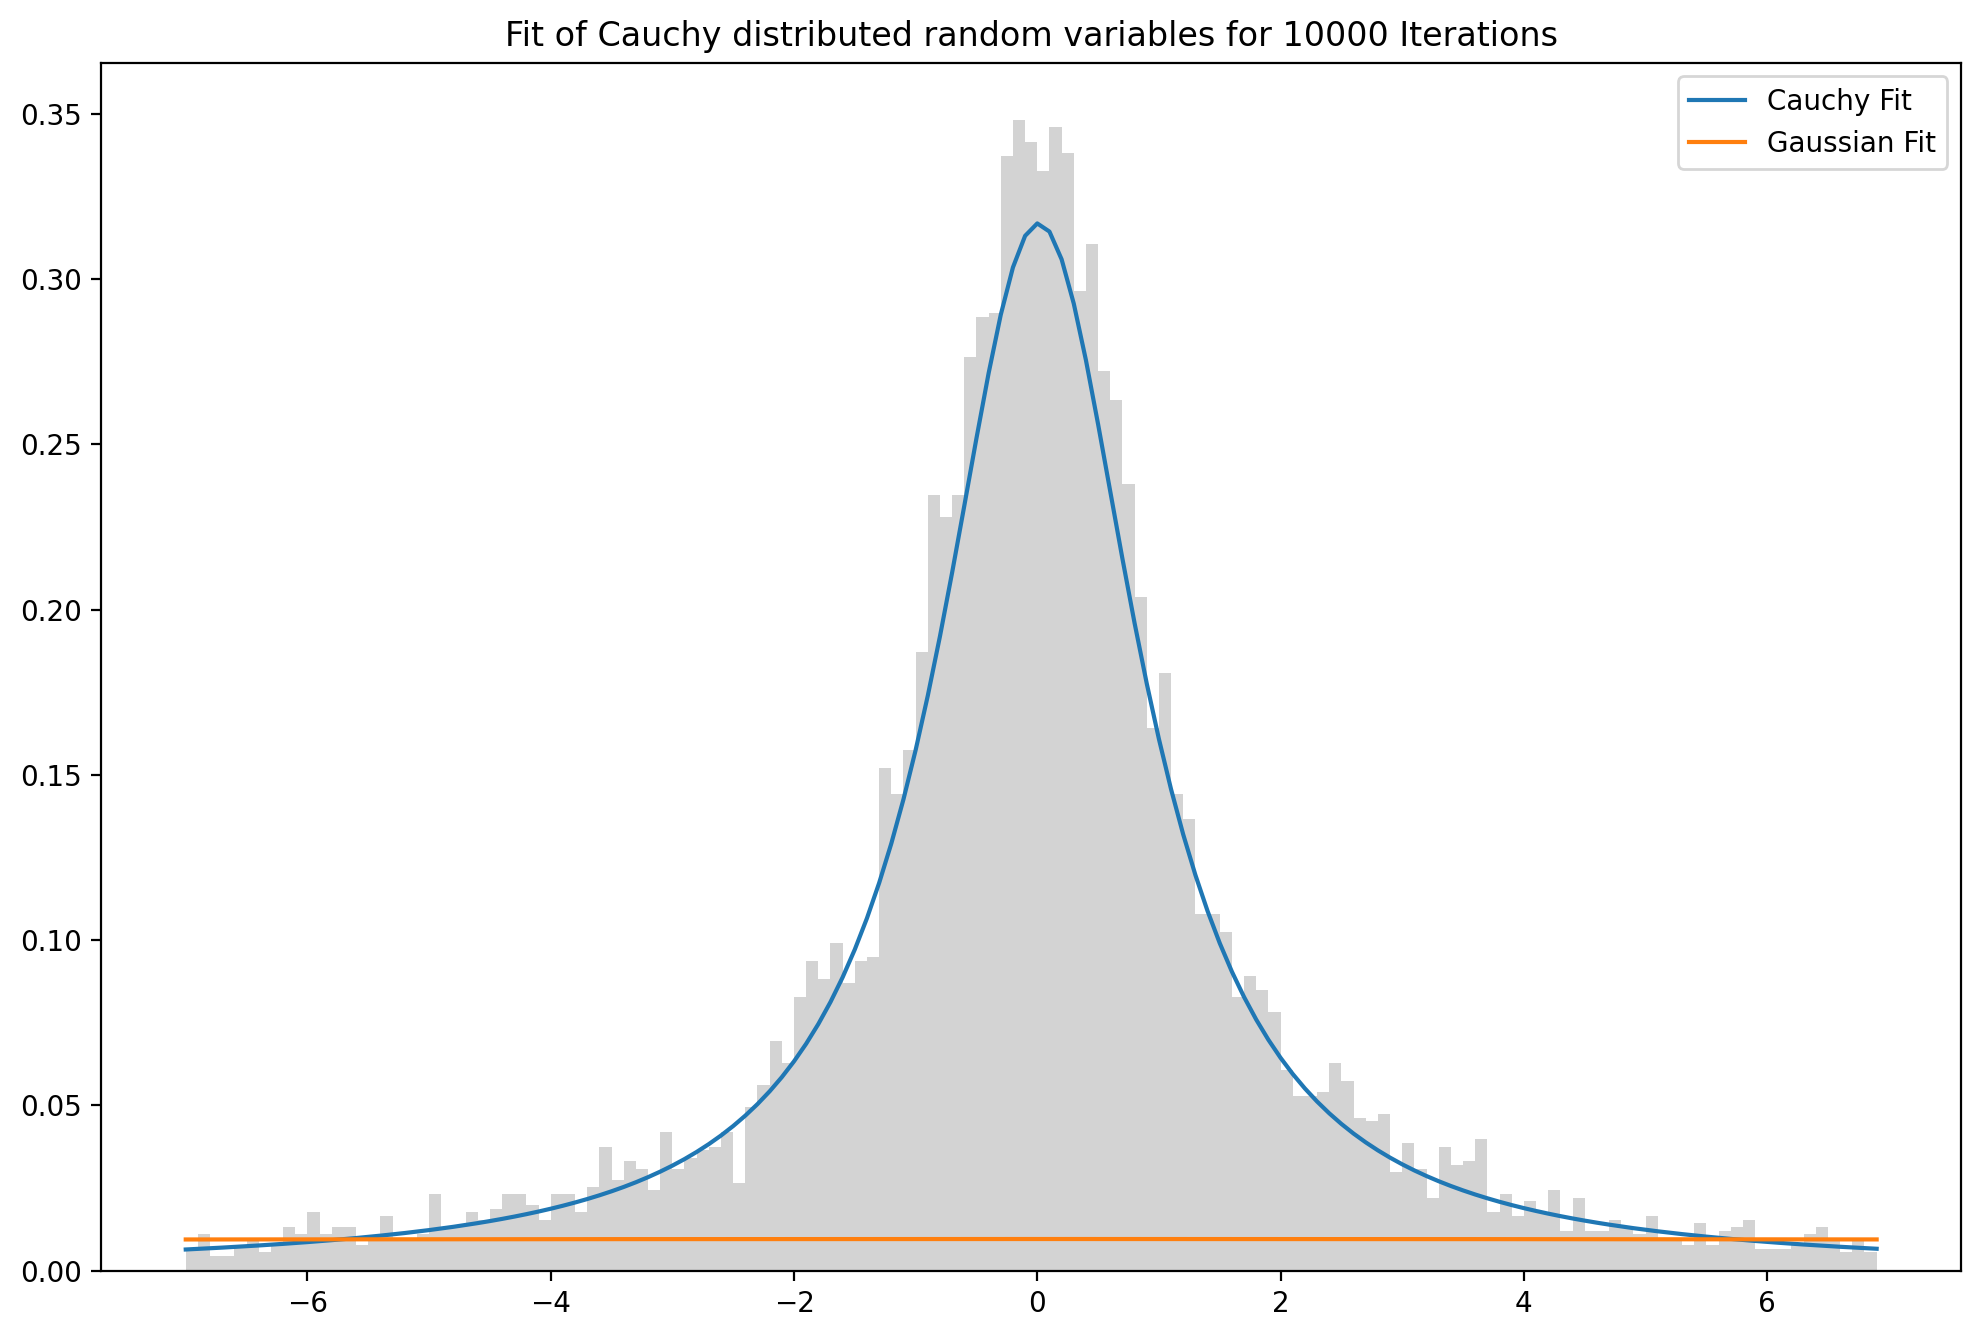

In [12]:
for i,m in enumerate([50, 1000, 10000]):
    cau = [np.mean(cauchy.rvs(size=n)) for i in range(0,m)]
    mean_c, sigma_c = scipy.stats.cauchy.fit(cau)
    mean_n, sigma_n = scipy.stats.norm.fit(cau)
    
    plt.plot(cbins, scipy.stats.cauchy.pdf(cbins,loc=mean_c,scale=sigma_c), label='Cauchy Fit')
    plt.plot(cbins, scipy.stats.norm.pdf(cbins,loc=mean_n,scale=sigma_n), label='Gaussian Fit')
    

    plt.hist(x=cau,bins=cbins, density=True,color='lightgray' );

    plt.title('Fit of Cauchy distributed random variables for {} Iterations'.format(m))
    plt.legend(loc='best')
    plt.show();

However, this does not work for the Cauchy RVs as the Cauchy distribution has **infinite** variance